# Top 100 Countries in Africa by Revenue

## Introduction
In this project, I analysed the largest companies in Africa by Revenue by scrapping data from Wikipedia. Wikipedia provides the data as of 2022. My objective was to extract the data successfully and perform an indepth analysis based on Industry and Countries where these companies are located.

### Tools
- **Pandas** - Data manipulation
- **BeautifulSoup and requests** - Web Scrapping
- **Matplotlib, seaborn and plotly** - Data Visualizations

#### Problem Statement

There is a gap in understanding how revenues are distributed across Africa’s key industries and countries, which makes it harder for stakeholders to make well-informed decisions. With a few large companies dominating sectors like telecommunications, mining, and oil & gas, it’s crucial to grasp the economic impact of these industries to better guide investment, policy, and business strategies. This analysis of the top 100 companies by revenue, broken down by industry and country, aims to provide clearer insights into these market leaders, the economic contributions of different sectors, and emerging opportunities. 

**Revenue** - represents the total sales a company achieves within a specific fiscal period, often before any expenses or deductions. This metric offers a snapshot of a company’s ability to sell its goods or services.It represents the gross income earned by a company. This metric is found at the top line of the Income statement.

#### Objectives
The objective of this analysis is to examine the distribution of the top 100 companies in Africa by revenue, industry, and country to understand the factors contributing to their dominance. 


### Data Collection

In [372]:
import pandas as pd
import numpy as np
import warnings; warnings.filterwarnings('ignore')
# Scrapping libraries
import requests
from bs4 import BeautifulSoup
# Visualisation
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
sns.set_style("darkgrid")

In [185]:
url = 'https://en.wikipedia.org/wiki/List_of_largest_companies_in_Africa_by_revenue'
r = requests.get(url)
soup = BeautifulSoup(r.text, 'html')

In [186]:
soup.find('table', class_ = "wikitable sortable jquery-tablesorter")

In [187]:
table = soup.find_all('table')[1]
table

<table class="wikitable sortable">
<tbody><tr>
<th>Rank</th>
<th>Company</th>
<th>Industry</th>
<th>Revenue<br/>(US$ billions)</th>
<th width="150">Headquarters
</th></tr>
<tr>
<td>1</td>
<td><a href="/wiki/Sonatrach" title="Sonatrach">Sonatrach</a></td>
<td>Oil and gas</td>
<td>77.013</td>
<td><span class="flagicon"><span class="mw-image-border" typeof="mw:File"><span><img alt="" class="mw-file-element" data-file-height="600" data-file-width="900" decoding="async" height="15" src="//upload.wikimedia.org/wikipedia/commons/thumb/7/77/Flag_of_Algeria.svg/23px-Flag_of_Algeria.svg.png" srcset="//upload.wikimedia.org/wikipedia/commons/thumb/7/77/Flag_of_Algeria.svg/35px-Flag_of_Algeria.svg.png 1.5x, //upload.wikimedia.org/wikipedia/commons/thumb/7/77/Flag_of_Algeria.svg/45px-Flag_of_Algeria.svg.png 2x" width="23"/></span></span> </span><a href="/wiki/Algeria" title="Algeria">Algeria</a>
</td></tr>
<tr>
<td>2</td>
<td><a href="/wiki/Eskom" title="Eskom">Eskom</a></td>
<td>Electric utility</t

In [188]:
#find  headers
soup.find_all('th')

[<th>Rank</th>,
 <th>Company</th>,
 <th>Industry</th>,
 <th>Revenue<br/>(US$ billions)</th>,
 <th width="150">Headquarters
 </th>]

In [189]:
#Title of the page
soup.title

<title>List of largest companies in Africa by revenue - Wikipedia</title>

In [190]:
#Extract headers
headers = [header.text.strip() for header in soup.find_all('th')]
headers


['Rank', 'Company', 'Industry', 'Revenue(US$ billions)', 'Headquarters']

In [191]:
#Extract Rows
rows = []
for row in soup.find_all('tr'):
    row_data = row.find_all('td')
    individual_row = [data.text.strip() for data in row_data]
    rows.append(individual_row)
    


In [192]:
revenue_data = pd.DataFrame(rows, columns = headers)
revenue_data.head()

,Rank,Company,Industry,Revenue(US$ billions),Headquarters
0,,This article relies largely or entirely on a s...,None,None,None
1,None,None,None,None,None
2,1,Sonatrach,Oil and gas,77.013,Algeria
3,2,Eskom,Electric utility,13.941,South Africa
4,3,Sasol,Chemistry,12.989,South Africa


In [193]:
# Skip the first 2 rows
revenue_data = revenue_data.iloc[2:].reset_index()
# Rename Headquarters to Country
revenue_data.rename(columns = {"Headquarters":"Country"}, inplace = True)

### Data Cleaning

In [195]:
# copy of the data
data = revenue_data.copy()
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 6 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   index                  100 non-null    int64 
 1   Rank                   100 non-null    object
 2   Company                100 non-null    object
 3   Industry               100 non-null    object
 4   Revenue(US$ billions)  100 non-null    object
 5   Country                100 non-null    object
dtypes: int64(1), object(5)
memory usage: 4.8+ KB


In [196]:
# Check for duplicates
data.duplicated().sum()

0

The final dataset consists of 100 companies in Africa which is consistent with the data on Wikipedia.
1. There are 100 records and 4 columns
2. There are no null values
3. There are no duplicates
4. All columns are categorical type after scrapping. I will convert the Revenue column to a numerical data type and rename the column as well.

In [330]:
# Convert Revenue to numeric data type
data['Revenue(US$ billions)'] = data['Revenue(US$ billions)'].astype(float)
# Rename column
data.rename(columns = {'Revenue(US$ billions)': 'Revenue (USD billions)'})
data.drop(columns = 'index', inplace=True)
data.describe()

,Revenue(US$ billions)
count,100.000000
mean,4.494560
std,7.810548
min,1.240000
25%,1.869250
50%,2.695500
75%,4.806250
max,77.013000


In [332]:
data.nunique()

Rank                     100
Company                  100
Industry                  23
Revenue(US$ billions)     99
Country                   14
dtype: int64

In [334]:
data.head()

,Rank,Company,Industry,Revenue(US$ billions),Country
0,1,Sonatrach,Oil and gas,77.013,Algeria
1,2,Eskom,Electric utility,13.941,South Africa
2,3,Sasol,Chemistry,12.989,South Africa
3,4,MTN Group,Telecommunications,12.238,South Africa
4,5,Shoprite Holdings,Retail,10.802,South Africa


**Insights**
1. The average revenue for the top 100 companies in Africa is $2.695 billion
2. 14 countries in Africa are represented among these countries
3. These companies are spread across 23 industries.

## Data Visualisation

#### Revenue Distribution Across Industries


In [336]:
revenue_by_industry = data.groupby("Industry").agg(Revenue=("Revenue(US$ billions)", "sum")).sort_values("Revenue", ascending=False)
revenue_by_industry.head()

,Revenue
Industry,
Oil and gas,119.261
Telecommunications,57.313
Mining,54.510
Retail,45.582
Holding,30.378


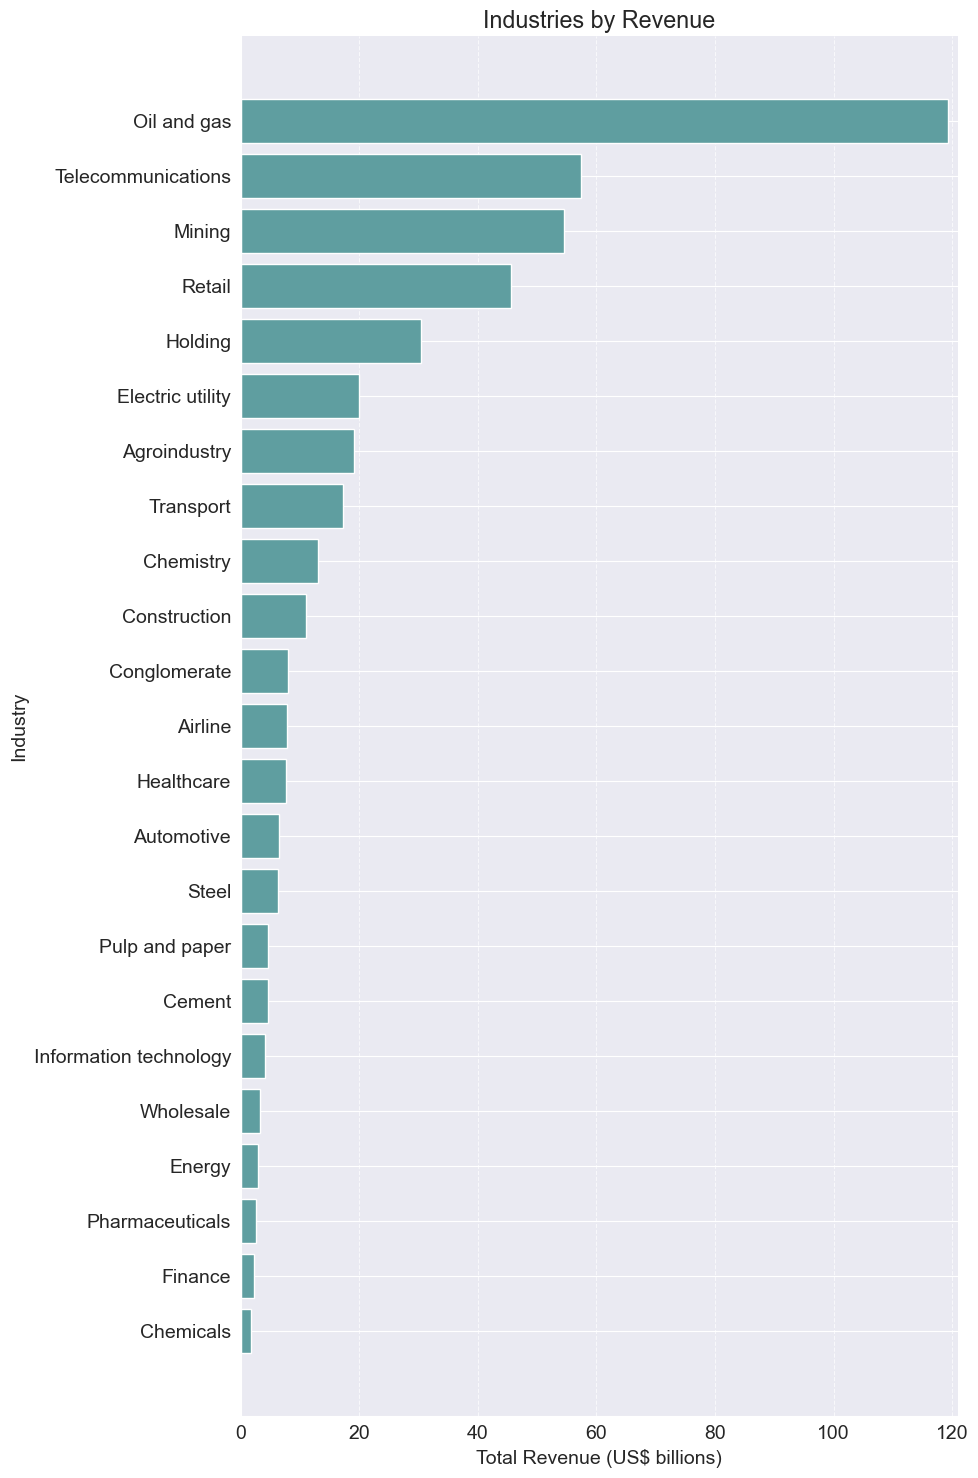

In [338]:
# Plot All industries by Total Revenue
plt.figure(figsize=(10, 15))
plt.barh(revenue_by_industry.index, revenue_by_industry["Revenue"], color="cadetblue")
plt.xlim(0, 121)
plt.xticks(range(0, 121, 20))
plt.xlabel("Total Revenue (US$ billions)")
plt.ylabel("Industry")
plt.title("Industries by Revenue")
plt.gca().spines["top"].set_visible(False)
plt.gca().spines["right"].set_visible(False)
plt.gca().invert_yaxis()
plt.grid(axis="x", linestyle="--", alpha=0.7)
plt.tight_layout()
plt.show()

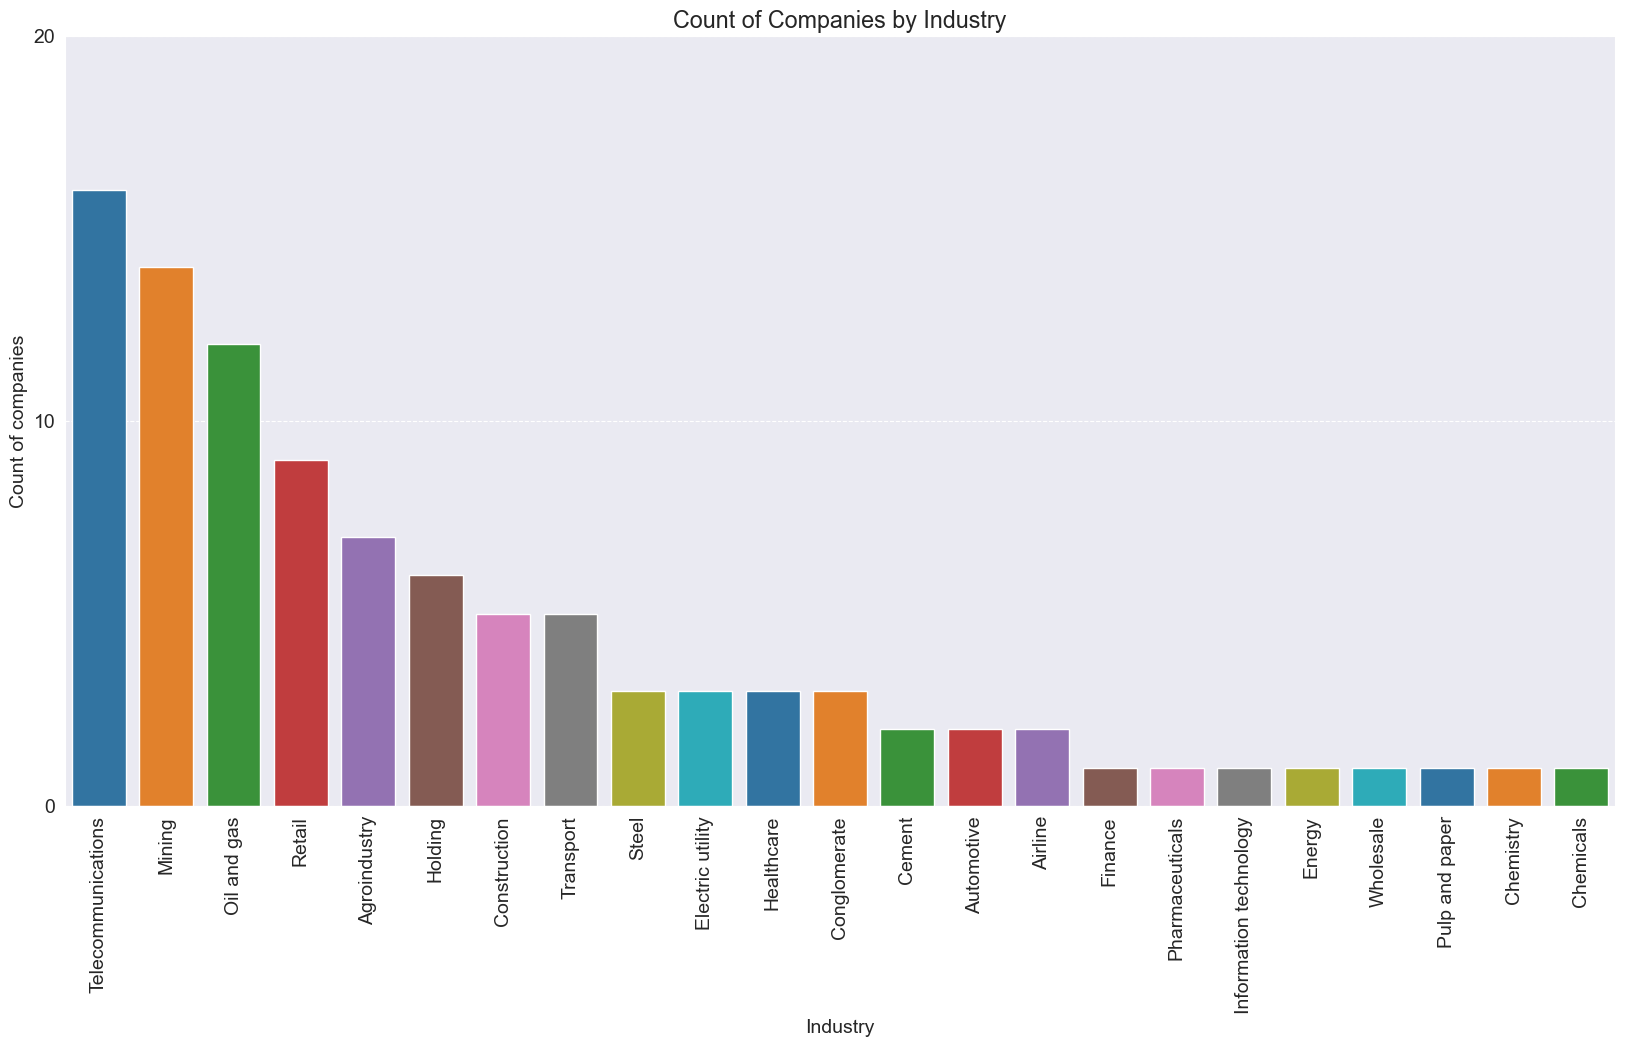

In [374]:
industry_counts = data['Industry'].value_counts().index
plt.figure(figsize=(20, 10))
plt.rcParams.update({'font.size': 14})
sns.countplot(x = 'Industry', data = data, order = industry_counts, palette ='tab10')
plt.ylim(0, 20)
plt.yticks(range(0, 21, 10))
plt.grid(axis='y', linestyle='--', alpha=1)
plt.xticks(rotation = 90)
plt.xlabel('Industry')
plt.ylabel('Count of companies')
plt.title('Count of Companies by Industry')
plt.show()

In [364]:
industry_counts

Index(['Telecommunications', 'Mining', 'Oil and gas', 'Retail', 'Agroindustry',
       'Holding', 'Construction', 'Transport', 'Steel', 'Electric utility',
       'Healthcare', 'Conglomerate', 'Cement', 'Automotive', 'Airline',
       'Finance', 'Pharmaceuticals', 'Information technology', 'Energy',
       'Wholesale', 'Pulp and paper', 'Chemistry', 'Chemicals'],
      dtype='object', name='Industry')

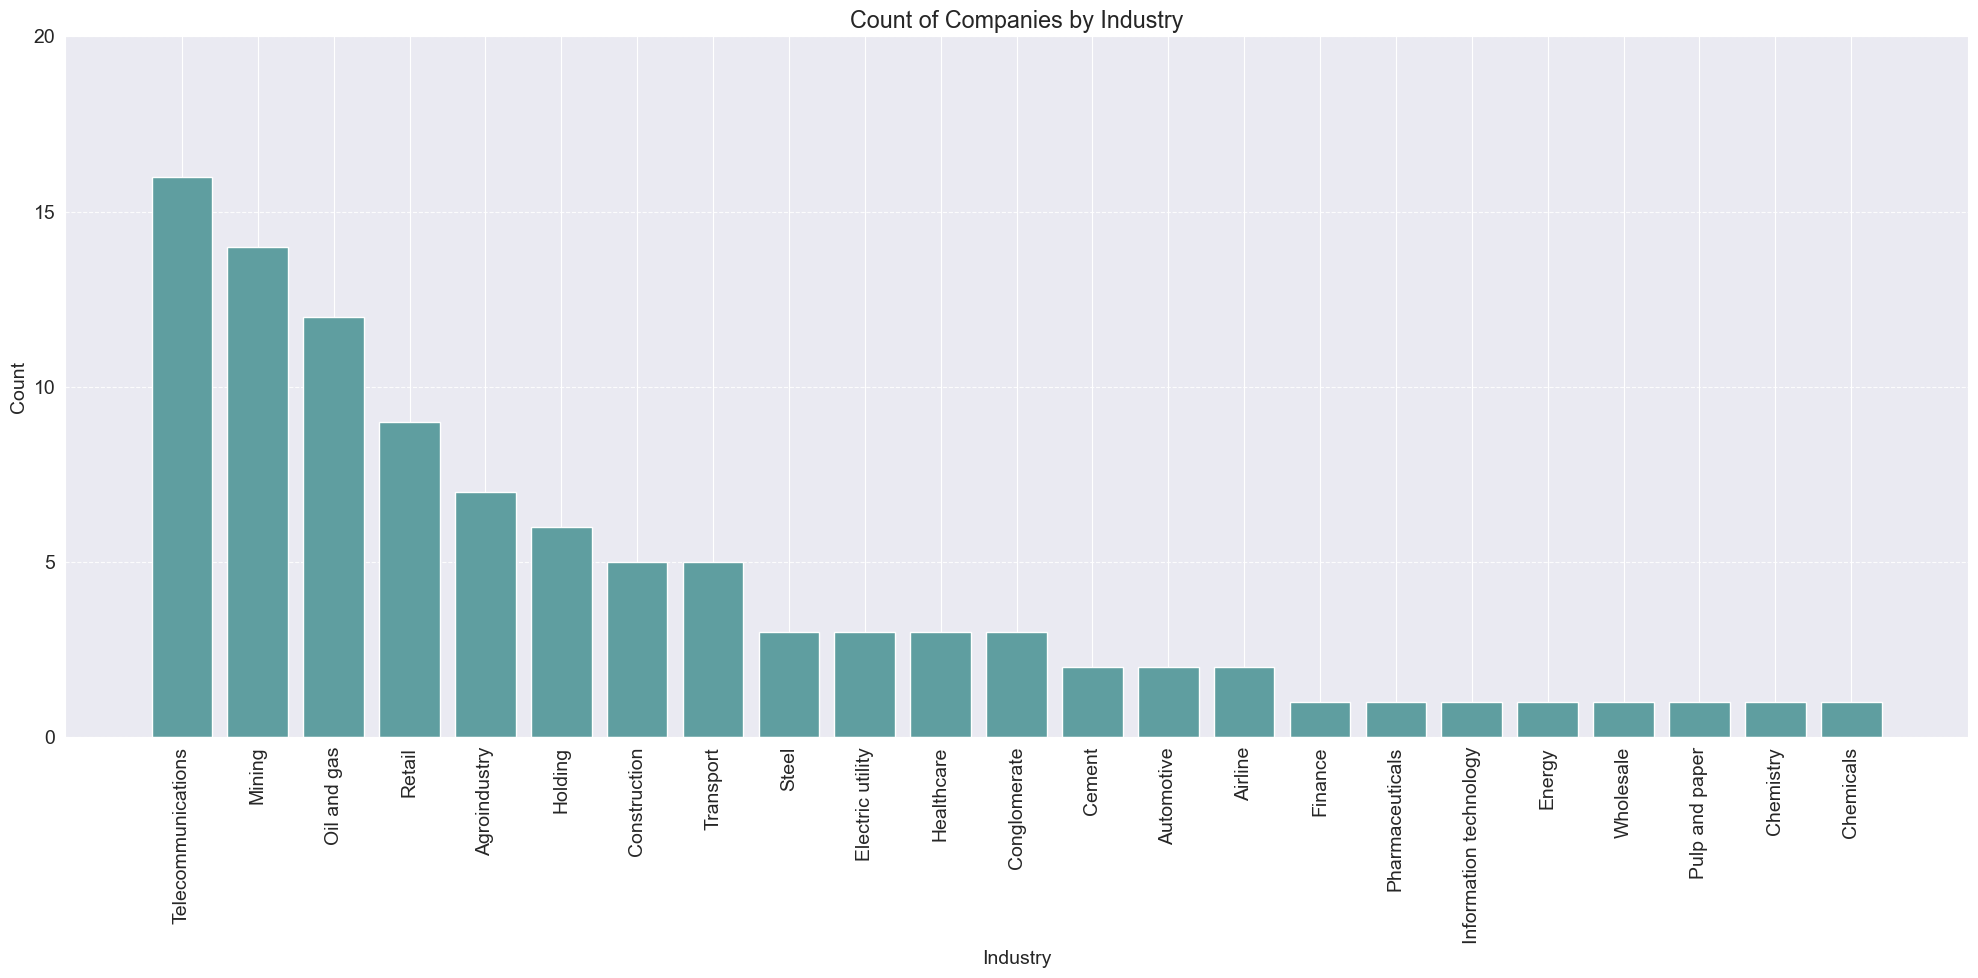

In [346]:
plt.figure(figsize=(20, 10))
industry_counts = data['Industry'].value_counts()
plt.rcParams.update({'font.size': 14})
# Create a bar plot with the industries and their counts
plt.bar(industry_counts.index, industry_counts.values, color='cadetblue')
plt.ylim(0, 20)
plt.yticks(range(0, 21, 5))
plt.grid(axis='y', linestyle='--', alpha=0.9)
plt.xticks(rotation=90)
plt.xlabel('Industry')
plt.ylabel('Count')
plt.title('Count of Companies by Industry')
plt.tight_layout()
plt.show()

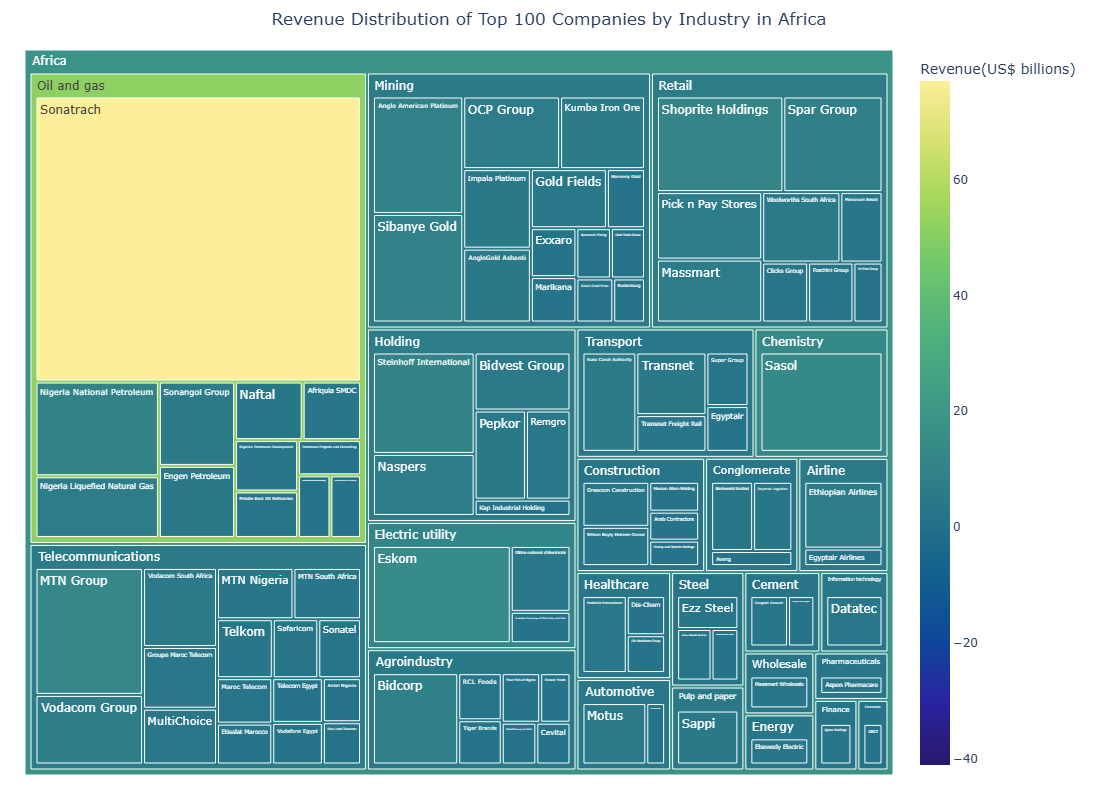

In [356]:
#distribution of Companies' Revenue by Industry
fig = px.treemap(
    data, 
    path=[px.Constant("Africa"), 'Industry', 'Company'], 
    values='Revenue(US$ billions)', 
    color='Revenue(US$ billions)', 
    hover_data=['Company'],
    color_continuous_scale='haline',
    color_continuous_midpoint=np.average(data['Revenue(US$ billions)'], weights=data['Revenue(US$ billions)']),
    title='Revenue Distribution of Top 100 Companies by Industry in Africa'
)
fig.update_layout(
    title={'text': 'Revenue Distribution of Top 100 Companies by Industry in Africa', 'x': 0.5},
    width=1200,
    height=800,
    margin=dict(t=50, l=25, r=25, b=25))
fig.show()

### Industry Insights
 - **Telecommunications and Mining**
   
The Telecommunications and Mining industries dominate as they have the most companies but also because they generate significant revenue. 
There are 16 telecommunications companies bringing in USD 57.31 billion and 14 mining companies contributing USD 54.51 billion. These sectors dominate in both revenue and the number of players in the market, and it makes sense given Africa's growing digital economy and mineral resources.
Also worth noting is that telecommunication companies such as MTN Group, Vodacom and Safaricom, are multinational comapnies, spanning multiple countries, thus enjoy economies of scale and access to international markets.

 - **Oil and Gas Industry**

The Oil and Gas industry has the highest total revenue at $119.26 billion, but with only 12 companies, this suggests that this sector is highly concentrated. A smaller number of companies control significant revenue, reflecting the larger size and impact of individual players in this industry.
Sonatrach, based in Algeria, a state owned company, is the seventh largest gas company in the world, 12th largest oil consortium in the world, with 154 subsidiaries. In recent years thr company has  diversified into petrochemistry and the desalination of seawater further contributing to its revenue.With concessions in multiple countries, including Venezuela, have propelled Algeria’s gas industry to new heights.

 - **Retail and Agroindustry**

The Retail industry, with 9 companies generating $45.58 billion, shows the strength of consumer-driven sectors in Africa. The relatively high total revenue reflects the growing consumer market in Africa. Notably, Shoprite Holdings is the largest supermarket retailer in Africa with over 3000 stores across Southern Africa. It is also listed in the stock exchenge in South Africa, Namimbia and Lusaka. On the other hand, the Spar group is a  warehousing and distribution business that provides fresh prouce to independent retailers.

The Agroindustry, which includes 7 companies making $19.05 billion, also plays a key role. This indicates that the agricultural sector is a significant contributor to the continent’s economy. Bidcorp is an international company with presence in five continents, further spurring its dominance in the agriculture sector.

 - **Healthcare, Steel and Electric Utility**

Industries like Healthcare, Steel, and Electric Utility also play important roles in Africa’s business ecosystem. While there are fewer companies in these sectors, they still generate considerable revenue, demonstrating that specialized industries, have a big impact.

 - **Cement, Automotive, and Conglomerate**

Cement, Automotive, and Conglomerate industries also contribute meaningfully to the total revenue but with fewer companies. 

 - **Others**

Some sectors, such as **Finance, Energy, Information Technology (IT)**, and **Pharmaceuticals**, may only have 1-2 companies each, but they still add value to Africa’s economy. These industries, while less numerous, suggest that the market is becoming more diverse, with smaller but important sectors emerging across the continent. It is worth noting that these sectors are very niche and specialized industries.
The Chemicals, Wholesale, and Pulp and Paper sectors also fall into this category. They have small number of companies accounting for a modest share of the overall revenue.


**Revenue Distribution**

The revenue distribution clearly shows that a small number of industries, particularly Telecommunications, Mining, and Oil & Gas, capture the majority of the revenue. This tells us that these sectors are very much dominated by a few large companies that have a major influence on the economy.
On the other hand, industries like Chemicals and Wholesale have a much smaller share of the total revenue. This suggests that while they play a role, they aren’t as big a driver of the overall economy in the same way as the larger sectors.

**Global Impact**

These insights further underscores Africa as a critical player in the global supply of natural resources, especially oil, natural gas and minerals. These resources are intergral to African economies and global markets.The continent’s oil and gas sectors are crucial for meeting global energy demand, while its mining industry is fundamental to the production of materials needed for emerging technologies and the green energy transition. As the world seeks to move toward more sustainable energy solutions and high-tech manufacturing, Africa’s strategic position as a major supplier of both energy and critical raw materials will continue to grow.
Additionally, as major companies in these sectors expand their operations, they stimulate job opportunities,investment opportunities, social benefits, increase tax revenues, stimulate infrastructure development, and local business growth, thus improving living standards and contributing to poverty reduction.

It’s important to note that the data referenced here focuses only on the top 100 companies by revenue. While these companies certainly dominate their respective sectors, there are many smaller, emerging players in the oil, gas, and mining industries that are also contributing to economic growth and job creation in Africa. These emerging companies, often driven by innovation, technological advances, and local entrepreneurship, are expanding rapidly and carving out significant market share in their respective sectors.

Many African countries are also actively fostering the growth of local companies in these industries, through partnerships, government incentives, and investment in infrastructure. This is leading to the emergence of new regional players who are beginning to challenge the dominance of larger, multinational corporations, further diversifying the industry landscape and creating new opportunities for employment and growth

## Country-Level Performance

The following visualizations provide complementary insights into our dataset at the country level:

**Total Revenue by Country:** This bar chart displays the aggregated sum of revenue generated by companies in each country. 

**Count of Companies by Country:** This count plot illustrates the distribution of companies across various countries.

**Treemap:**  presents a comprehensive overview of company revenues, grouped by country. The goal is  to explore the distribution of revenue across different countries and their respective companies.

In [237]:
revenue_by_country = data.groupby('Country').agg(Total_Revenue=("Revenue(US$ billions)", "sum")).sort_values("Total_Revenue", ascending=False)
revenue_by_country.head()

,Total_Revenue
Country,
South Africa,254.632
Algeria,81.804
Egypt,35.361
Nigeria,30.316
Morocco,21.521


<Figure size 2000x1500 with 0 Axes>

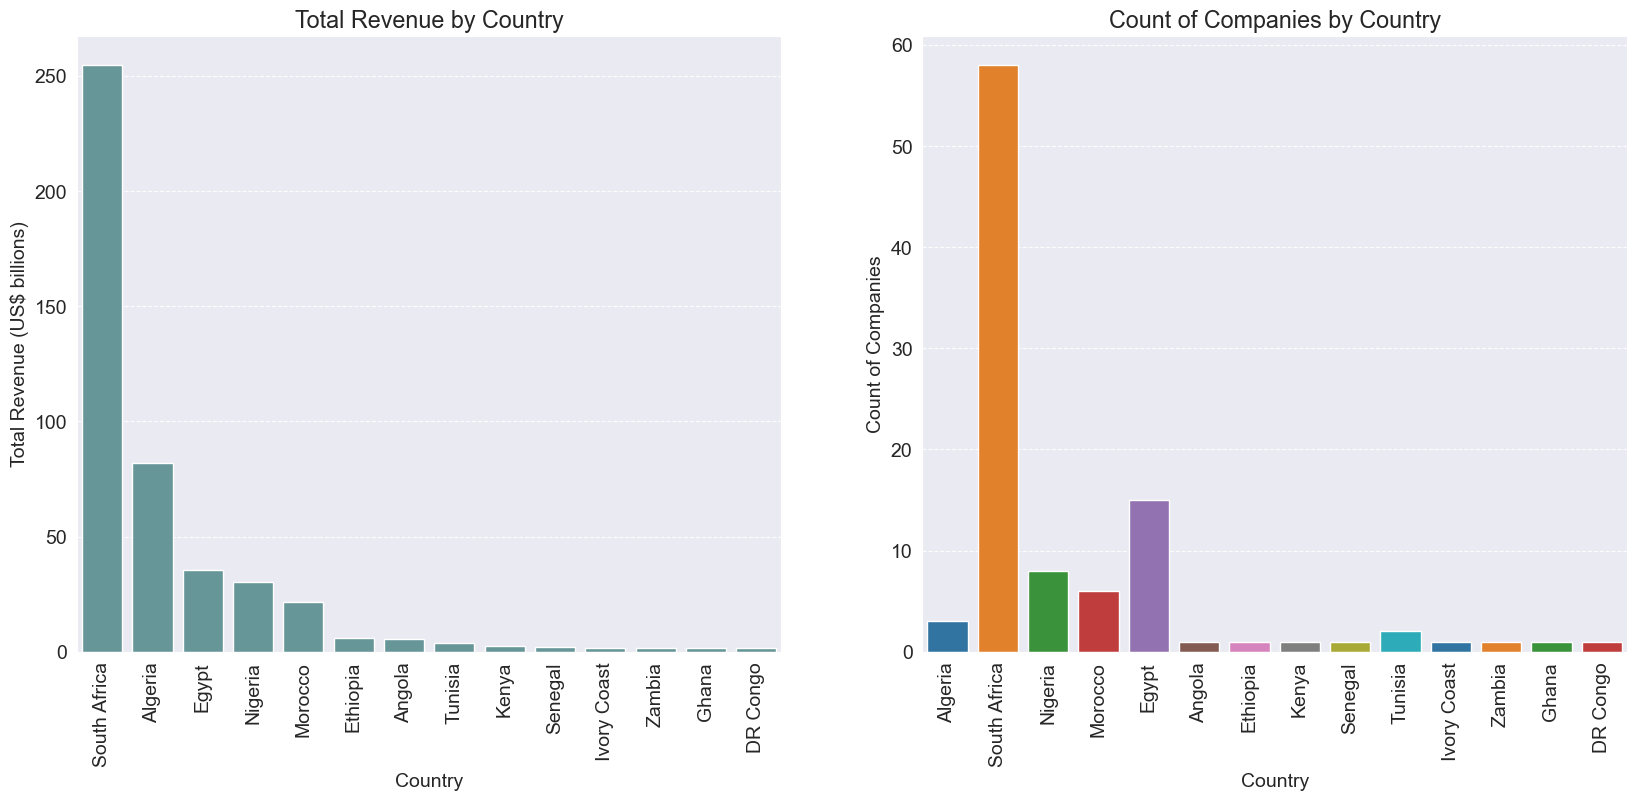

In [360]:

# Subplots
plt.figure(figsize=(20, 15))
plt.rcParams.update({'font.size': 14})
fig, axes = plt.subplots(1, 2, figsize=(20, 8))
# Total Revenue by Countries
sns.barplot(x=revenue_by_country.index, y=revenue_by_country['Total_Revenue'], ax=axes[0], color = 'cadetblue')
axes[0].set_title('Total Revenue by Country')
axes[0].set_xlabel('Country')
axes[0].set_ylabel('Total Revenue (US$ billions)')
axes[0].tick_params(axis='x', rotation=90)  # Rotate x-axis labels for better readability
axes[0].grid(axis='y', linestyle='--', alpha=0.9)  # Add gridlines to the y-axis
# Count of Companies by Countries
sns.countplot(x='Country', data=data, ax=axes[1], hue='Country', palette= 'tab10')
axes[1].set_title('Count of Companies by Country')
axes[1].set_xlabel('Country')
axes[1].set_ylabel('Count of Companies')
axes[1].tick_params(axis='x', rotation=90)
axes[1].grid(axis='y', linestyle='--', alpha=0.9)
#plt.tight_layout()
plt.show()


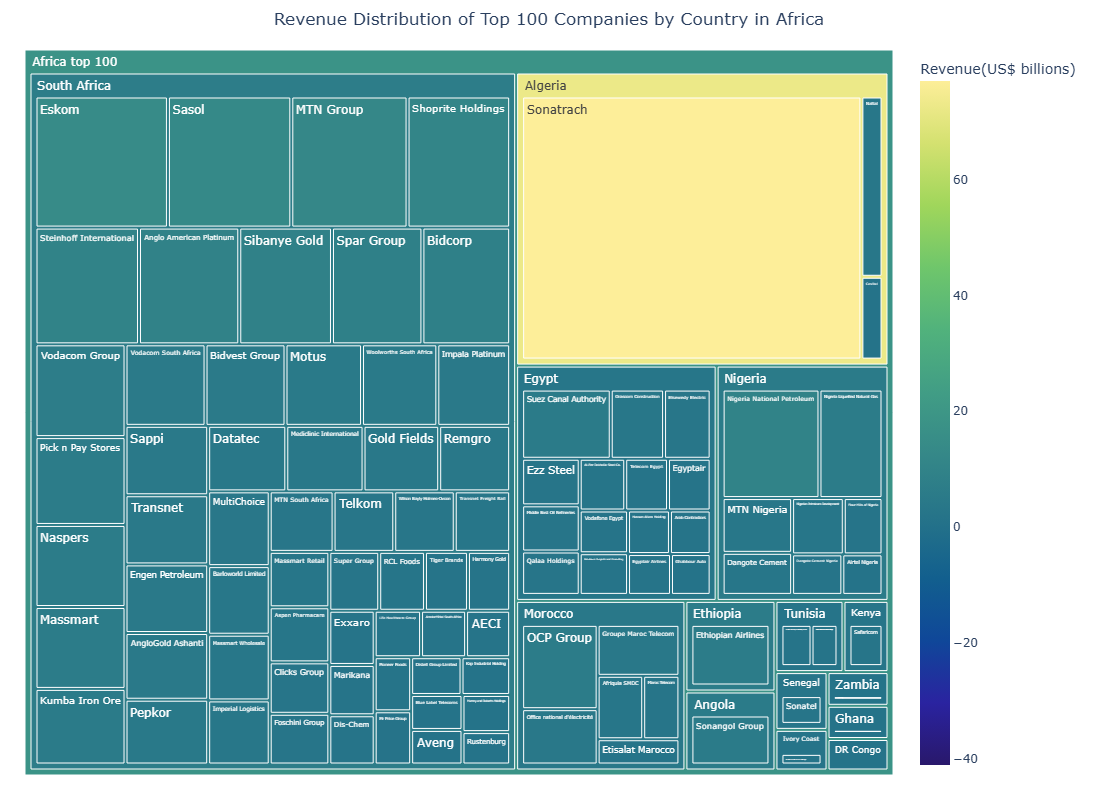

In [354]:
# Revenue Distribution of Top 100 Companies by Country in Africa
fig = px.treemap(
    data, 
    path=[px.Constant("Africa top 100"), 'Country', 'Company'], 
    values='Revenue(US$ billions)', 
    color='Revenue(US$ billions)', 
    hover_data=['Company'],
    color_continuous_scale='haline',
    color_continuous_midpoint=np.average(data['Revenue(US$ billions)'], weights=data['Revenue(US$ billions)']),
    title='Revenue Distribution of Top 100 Companies by Country in Africa'
)

fig.update_layout(
    title={'text': 'Revenue Distribution of Top 100 Companies by Country in Africa', 'x': 0.5},
    width = 1200,height=800, 
    margin = dict(t=50, l=25, r=25, b=25))
fig.show()

### Insights
**1. South Africa**

South Africa dominates the top 100 list, with 58 entries generating a combined 254.63 billion USD in revenue. South Africa is also the third largest economy in Africa with a GDP of almost $400 billion as of 2023. The country has a high corporate presence and a diversified economy.

**2. North Africa -  Egypt,Tunisia, Morocco and Algeria**

Egypt follows with 15 companies generating 35.36 billion USD, reflecting its diversified economy in telecommunications, oil & gas, and construction. 
Morocco’s six companies generate 21.52 billion USD, with key players in banking, insurance, and energy sectors.

Algeria has 3 entries, but ranks second in revenue, largely due to Sonatrach's dominance.
North African economies benefit from their access to European and Middle Eastern markets, foreign direct investments, well-developed infrastructure and diversified industries.

**3. West Africa - Nigeria, Ghana,Senegal, Ivory Coast**

Nigeria, Africa’s largest economy by GDP, has eight companies generating $30.31 billion. The presence of oil and gas firms, along with banking and telecommunications firms, reinforces its’s role as a regional business hub. 

Ghana, Senegal and Ivory coast, each have a single entry in the mining, telecommunications and oil & gas industries respectively. These economies are steadily developing, benefiting from natural resource wealth and infrastructure investment.

**4. East Africa - Kenya and Ethiopia**

Kenya joins the list with a single entry from Safaricom, a telecommunications firm with presence in the region.The country has emerged as a tech hub in Africa, attracting startups and venture capital, particularly in FinTech and e-commerce.

Ethiopian Airlines, Africa’s largest and most profitable airline, reflects the country’s strategic aviation industry. With a fleet of 150+ aircraft, it connects Africa to global markets and drives tourism and trade.

**5. Central Africa**

The Kibali Gold mine is located in the Democratic Republic of Congo and is one of the largest gold mines on the continent. 
    
 

In [301]:
country_stats = data.groupby("Country").agg(Total_Revenue=("Revenue(US$ billions)", "sum"), Count=("Country", "count")).sort_values("Count", ascending=False)
country_stats

,Total_Revenue,Count
Country,,
South Africa,254.632,58
Egypt,35.361,15
Nigeria,30.316,8
Morocco,21.521,6
Algeria,81.804,3
Tunisia,3.632,2
Angola,5.332,1
DR Congo,1.440,1
Ethiopia,6.118,1


## Conclusions:

This analysis of the top 100 companies in Africa, by revenue, underscores the dominance of a few key industries while highlighting the emergence of smaller but growing sectors.
The following factors have influenced the dominance of these top companies in Africa:

- Multinational Presence – Many top companies operate across multiple countries, benefiting from economies of scale, diverse revenue streams, and access to international markets.
Monopolistic and Oligopolistic Practices – Some firms, particularly in telecommunications, oil & gas, and mining, dominate their industries due to high barriers to entry, regulatory advantages, or state backing.
- Natural Resource Endowment – Companies in oil, gas, and mining leverage Africa’s rich natural resources to generate massive revenues, benefiting from global demand.
- Market Size and Consumer Base – Firms in retail and telecommunications thrive due to Africa’s growing population and increasing digital adoption.
- State Ownership and Government Influence – Some of the largest firms, such as Sonatrach in Algeria, are state-owned, allowing them to control significant market share.
- Infrastructure and Trade Connectivity – Companies in North and South Africa benefit from advanced infrastructure, ports, and access to European and Middle Eastern markets.
- Foreign Direct Investment (FDI) – Sectors like banking, manufacturing, and telecoms attract foreign investors, providing capital and technical expertise.
- Regulatory and Policy Environment – Supportive government policies, tax incentives, and sectoral reforms have shaped the growth of dominant firms.
- Financial and Banking Strength – Strong financial institutions enable corporate growth through lending, investment, and financial services.
- Technological Advancement – Adoption of modern technology, digital transformation, and innovation have helped firms scale and remain competitive.
- Strategic Mergers and Acquisitions – Many top companies have expanded through acquisitions, increasing their market share and dominance.
- Regional Economic Blocs – Membership in trade blocs such as the African Continental Free Trade Area (AfCFTA) facilitates cross-border trade and expansion.

Africa’s global significance is evident through its role in supplying essential raw materials, energy, and industrial outputs to the world. The continent’s vast natural resources, expanding digital economy, and increasing industrialization positions it as a critical player in global markets. Continued investment, innovation, and policy reforms will be vital in fostering sustainable growth and further integrating African economies into global value chains.

Further analysis into market capitalization and profits could provide deeper insights into the financial strength and long-term sustainability of these companies, offering a clearer picture of investor confidence and sectoral profitability across the continent.

### Limitations

The analysis primarily focuses on revenue, which does not provide a complete picture of a company’s financial performance.To get a more holistic view of business performance, it is essential to consider a combination of indicators such as:
- Gross Profit Margin
- Operating Income (EBIT)
- EBITDA
- Net Income
- Cash Flows
- Return on Investment (ROI)